In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

<center><img SRC='money.png' align="center"/></center>
<center><h1 style="color: #DAA520">Ganancias anuales de un analista de datos</h1></center>
<center><h2 style="color: #FFD700">2017-2020</h2></center>
<p style="text-align:justify"> Este es un analisis para identificar las ganancias anuales de Analistas de datos, mediante diferentes variables como:. </p>
<ul>
    <li>Nivel academico, hobby, experiencia, satisfacció laboral, etc</li>
</ul>

<h2 style="color: #FF8C00"> Datos a utilizar:</h2>

In [63]:
df = pd.read_csv('processed_data_toDummies.csv')

<h2 style="color: #FFA500">Dataframe:<h2>

In [64]:
df.head()

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,1,1,NaN,NaN
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,1,0,NaN,NaN
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,1,0,NaN,NaN
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,0,1,NaN,NaN
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,0,1,NaN,NaN


<h2 style="color: #FFA500">Se eliminan columnas que no contienen informacion relevante para el analisis:<h2>

In [65]:
df = df.drop(columns = ['Data or business analyst', 'Engineer, data', 'OrgSize'])

<h2 style="color: #FFA500">Se edita el nombre de las columnas para mayor entendimiento de los datos:<h2>

In [66]:
df.rename(columns={'ConvertedComp':'Earnings'}, inplace = True)

In [67]:
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


<h2 style="color: #FFA500">Estandarizacion y normalizacion de datos:<h2>

<h3 style="color: #FF8C00">Datos faltantes:</h3>

In [68]:
df.isnull().sum()

Year                                                0
Hobbyist                                            0
Earnings                                            0
Country                                             0
EdLevel                                           463
Employment                                         40
JobSat                                             75
UndergradMajor                                   3086
YearsCodePro                                       83
Data scientist or machine learning specialist       0
Database administrator                              0
dtype: int64

In [69]:
df.replace("?", np.nan, inplace=True)

In [70]:
valoresPerdidos = df.isnull()
valoresPerdidos.head(15)

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


<h3 style="color: #FF8C00">Datos faltantes: sustitucion de valores faltantes en columna de 'Earnings'</h3>

In [71]:
avg_norm = df['Earnings'].astype('float').mean(axis=0) ##en la columna con los valores faltantes, convertirla en float. Con esto se calcula la media sobre ese eje 0
print('media del normalized: ', avg_norm)

media del normalized:  62593.09253052934


In [72]:
df['Earnings'].replace(np.nan, 62593.1, inplace=True)
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


In [73]:
df['UndergradMajor'].value_counts().idxmax()

'Computer science'

In [74]:
df['UndergradMajor'].replace(np.nan, 'Computer science', inplace=True)
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


In [75]:
df['EdLevel'].value_counts().idxmax()

"Bachelor's degree"

In [76]:
df['EdLevel'].replace(np.nan, "Bachelor's degree", inplace=True)
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


In [77]:
df['YearsCodePro'].value_counts().idxmax()

5.0

In [78]:
df['YearsCodePro'].replace(np.nan, "5.0", inplace=True)
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


In [114]:
df['Employment'].value_counts().idxmax()

'Employed full-time'

In [115]:
df['Employment'].replace(np.nan, "Employed full-time", inplace=True)
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


In [117]:
valoresPerdidos = df.isnull()
valoresPerdidos.head(5)
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")

Year
False    33526
Name: Year, dtype: int64

Hobbyist
False    33526
Name: Hobbyist, dtype: int64

Earnings
False    33526
Name: Earnings, dtype: int64

Country
False    33526
Name: Country, dtype: int64

EdLevel
False    33526
Name: EdLevel, dtype: int64

Employment
False    33526
Name: Employment, dtype: int64

JobSat
False    33526
Name: JobSat, dtype: int64

UndergradMajor
False    33526
Name: UndergradMajor, dtype: int64

YearsCodePro
False    33526
Name: YearsCodePro, dtype: int64

Data scientist or machine learning specialist
False    33526
Name: Data scientist or machine learning specialist, dtype: int64

Database administrator
False    33526
Name: Database administrator, dtype: int64



<h2 style="color: #FF8C00"> Conteo de la cantidad de analistas de datos segun su nivel academico:</h2>

In [119]:
gf1 = df.groupby(['EdLevel']).count()
gf1

,Year,Hobbyist,Earnings,Country,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
EdLevel,,,,,,,,,,
Associate degree,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
Bachelor's degree,14577,14577,14577,14577,14577,14577,14577,14577,14577,14577
Doctoral degree,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859
I never completed any formal education,139,139,139,139,139,139,139,139,139,139
I prefer not to answer,10,10,10,10,10,10,10,10,10,10
Master's degree,8996,8996,8996,8996,8996,8996,8996,8996,8996,8996
Primary/elementary school,197,197,197,197,197,197,197,197,197,197
Professional degree,501,501,501,501,501,501,501,501,501,501
Secondary school,1784,1784,1784,1784,1784,1784,1784,1784,1784,1784


In [82]:
gf1 = gf1.iloc[:,:1]
gf1

,Year
EdLevel,
Associate degree,1012
Bachelor's degree,14577
Doctoral degree,1859
I never completed any formal education,139
I prefer not to answer,10
Master's degree,8996
Primary/elementary school,197
Professional degree,501
Secondary school,1784


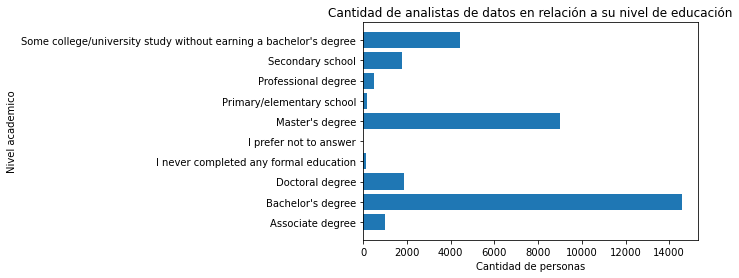

In [122]:
eje_x = ['Associate degree', "Bachelor's degree", "Doctoral degree", 'I never completed any formal education', 'I prefer not to answer', "Master's degree", 'Primary/elementary school', 'Professional degree', 'Secondary school', "Some college/university study without earning a bachelor's degree"]
eje_y = gf1['Year'].tolist()
plt.barh(eje_x, eje_y)
plt.ylabel('Nivel academico')
plt.xlabel('Cantidad de personas')
plt.title('Cantidad de analistas de datos en relación a su nivel de educación')
plt.show()

<h2 style='color: #000000'>Respuesta</h2>
<p>La mayoria de analistas de datos tienen un bachillerato en educación. Y la menor cantidad nunca completo un nivel de educación formal</p>

<h2 style="color: #FF8C00"> Cuál es el porcentaje de analistas de datos que programan por: hobby, trabajo o trabajo y hobby? </h2>

In [138]:
df.replace('Yes', 'Yes, I program as a hobby',inplace=True)
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


In [139]:
df.replace('Yes, I contribute to open source projects', 'Yes, I program as a hobby',inplace=True)
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


In [140]:
gf4 = df.groupby(['Hobbyist']).count()
gf4

,Year,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
Hobbyist,,,,,,,,,,
No,6205,6205,6205,6205,6205,6205,6205,6205,6205,6205
"Yes, I program as a hobby",26541,26541,26541,26541,26541,26541,26541,26541,26541,26541
"Yes, both",780,780,780,780,780,780,780,780,780,780


In [141]:
gf4 = gf4.iloc[:,1:2]

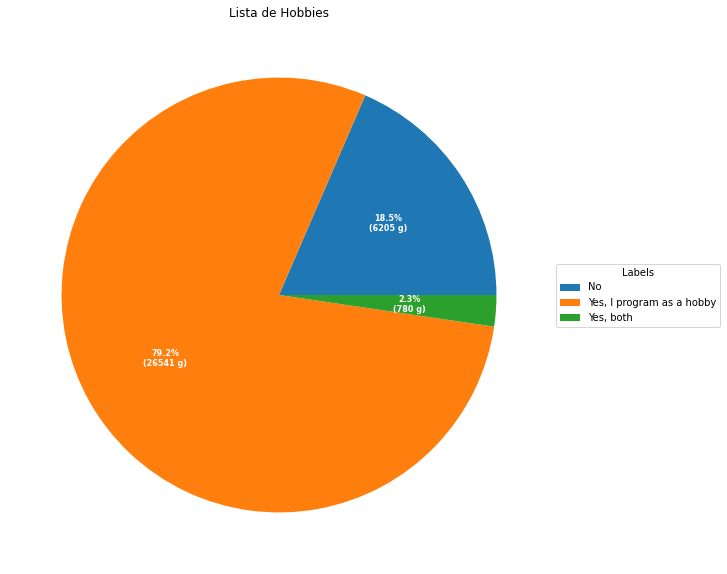

In [142]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

data = gf4['Earnings'].tolist()
Labels = ['No', 'Yes, I program as a hobby', 'Yes, both']


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, Labels,
          title= "Labels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Lista de Hobbies")

plt.show()

<ol>
    <li> 'No' No programa como hobby pero si trabaja programando</li>
    <li> 'Yes, I program as a hobby' Solo programa como hobby</li>
    <li> 'Yes, both' Programa por trabajo y por hobby</li>
<ol>

<h2 style='color: #000000'>Respuesta</h2>
<p>El mayor porcentaje de analistas de datos programan por hobby siguiendole los que programan por trabajo y de ultimo los que hacen ambas cosas.</p>

In [144]:
df.head()

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1


<h2 style='color: #DC143C'>1.Cuál es la relación entre el nivel de educación y el salario anual? </h2>

In [163]:
df.groupby('EdLevel').count()

,Year,Hobbyist,Earnings,Country,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
EdLevel,,,,,,,,,,
Associate degree,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
Bachelor's degree,14577,14577,14577,14577,14577,14577,14577,14577,14577,14577
Doctoral degree,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859
I never completed any formal education,139,139,139,139,139,139,139,139,139,139
I prefer not to answer,10,10,10,10,10,10,10,10,10,10
Master's degree,8996,8996,8996,8996,8996,8996,8996,8996,8996,8996
Primary/elementary school,197,197,197,197,197,197,197,197,197,197
Professional degree,501,501,501,501,501,501,501,501,501,501
Secondary school,1784,1784,1784,1784,1784,1784,1784,1784,1784,1784


In [147]:
pregunta_1 = df.groupby(['EdLevel']).mean()
pregunta_1.head(50)

,Year,Earnings,JobSat,Data scientist or machine learning specialist,Database administrator
EdLevel,,,,,
Associate degree,2018.867589,62505.046443,6.041502,0.096838,0.750000
Bachelor's degree,2018.764629,60400.136979,6.069150,0.258215,0.582219
Doctoral degree,2018.825713,88673.222548,6.472835,0.796127,0.144164
I never completed any formal education,2018.755396,57923.426729,5.985612,0.258993,0.719424
I prefer not to answer,2017.000000,22888.352446,6.400000,0.200000,1.000000
Master's degree,2018.819253,65878.782666,6.147732,0.473544,0.369386
Primary/elementary school,2018.664975,51352.225396,5.939086,0.203046,0.761421
Professional degree,2018.840319,42121.896861,5.822355,0.217565,0.650699
Secondary school,2018.598655,49834.127953,6.221973,0.141256,0.782511


In [148]:
pregunta_1_1 = pregunta_1.iloc[:, [1]]
pregunta_1_1.head(10)

,Earnings
EdLevel,
Associate degree,62505.046443
Bachelor's degree,60400.136979
Doctoral degree,88673.222548
I never completed any formal education,57923.426729
I prefer not to answer,22888.352446
Master's degree,65878.782666
Primary/elementary school,51352.225396
Professional degree,42121.896861
Secondary school,49834.127953


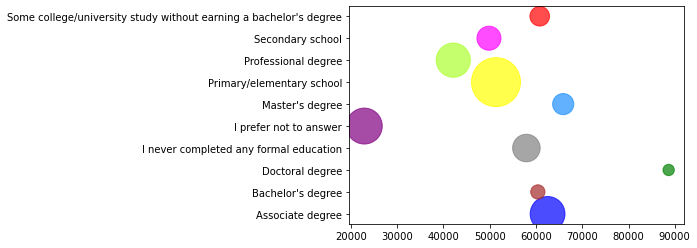

In [173]:
np.random.seed(123)
N = 10
y = ['Associate degree', "Bachelor's degree", 'Doctoral degree', 'I never completed any formal education', 'I prefer not to answer', "Master's degree", 'Primary/elementary school', 
    'Professional degree', 'Secondary school', "Some college/university study without earning a bachelor's degree"]
x = pregunta_1_1['Earnings'].tolist()
colors =['#0000FF', '#A52A2A', '#008000', '#808080', '#800080', '#1E90FF', '#FFFF00', '#ADFF2F', '#FF00FF', '#FF0000']
area = (50 * np.random.rand(N)) ** 2
plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.show()

In [174]:
df.groupby('EdLevel').size()

EdLevel
Associate degree                                                      1012
Bachelor's degree                                                    14577
Doctoral degree                                                       1859
I never completed any formal education                                 139
I prefer not to answer                                                  10
Master's degree                                                       8996
Primary/elementary school                                              197
Professional degree                                                    501
Secondary school                                                      1784
Some college/university study without earning a bachelor's degree     4451
dtype: int64

<h2 style='color: #000000'>Respuesta</h2>
<p> El nivel de educacion, en su mayoria, determina el monto salarial anual de un analista de datos. Ya que, entre mas especializado sea el titulo mayor será la ganancia. Pero, de igual forma podemos ver que los doctorados o titulos mayores estan en menor cantidad. Es decir, los titulos mas altos ganan mas pero hay menor cantidad.</p>

<h2 style='color: #000000'>2. Cuál fue el promedio de satisfacción laboral de 2017 a 2020? </h2>

In [175]:
gf123 = df.groupby(['Year']).mean()
gf123.head()

,Earnings,JobSat,Data scientist or machine learning specialist,Database administrator
Year,,,,
2017,56315.012745,6.973417,0.434715,0.686083
2018,62160.864407,6.236543,0.311324,0.603930
2019,63887.499072,5.966675,0.312999,0.493101
2020,63410.035983,5.942452,0.311982,0.479265


In [176]:
gf123.iloc[:, [1]]

,JobSat
Year,
2017,6.973417
2018,6.236543
2019,5.966675
2020,5.942452


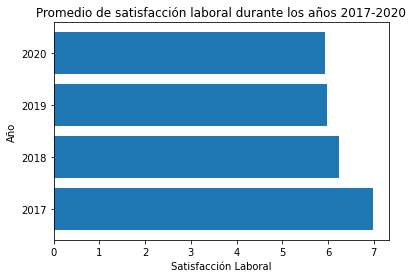

In [177]:
eje_x = ['2017', '2018', '2019', '2020']
eje_y = gf123['JobSat'].tolist()
plt.barh(eje_x, eje_y)
plt.ylabel('Año')
plt.xlabel('Satisfacción Laboral')
plt.title('Promedio de satisfacción laboral durante los años 2017-2020')
plt.show()

<h2 style='color: #000000'>Respuesta</h2>
<p> En promedio, la satisfacción laboral anual fue mayor en el año 2017, llegando a casi 7.0 en una escala de 0.0 a 10.0. Teniendo una disminucion el año siguiente con poco mas de 6.0. Luego en 2019 y 2020 se mantuvo por debajo de 6.0.</p>

<h2 style='color: #000000'>3. Cual es la relación entre la cantidad de dinero que se gana, como analista de datos y los años que llevan programando profesionalmente?  </h2>

In [179]:
gf3 = df.groupby('YearsCodePro').count()
gf3

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,Data scientist or machine learning specialist,Database administrator
YearsCodePro,,,,,,,,,,
1.0,1948,1948,1948,1948,1948,1948,1948,1948,1948,1948
2.0,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
3.0,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365
4.0,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
5.0,4931,4931,4931,4931,4931,4931,4931,4931,4931,4931
6.0,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392
7.0,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047
8.0,2780,2780,2780,2780,2780,2780,2780,2780,2780,2780
9.0,634,634,634,634,634,634,634,634,634,634


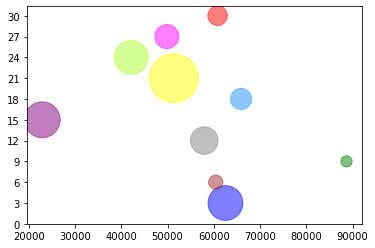

In [180]:
np.random.seed(123)
N = 10
y = [3, 6 ,9,12,15,18,21,24,27,30]
x = pregunta_1_1['Earnings'].tolist()
colors =['#0000FF', '#A52A2A', '#008000', '#808080', '#800080', '#1E90FF', '#FFFF00', '#ADFF2F', '#FF00FF', '#FF0000']
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.yticks(np.arange(0,31,3))
plt.show()


<h2 style='color: #000000'>Respuesta</h2>
<p> Tomando en cuenta el grafico que muestra la relacion entre el salario anual de una analista y el nivel de educacion podemos inferir que entre mayor sea el grado de educacio mas 'rapidamente' un analista puede llegar a ganar una mayor cantidad de dinero de manera anual. Mientras que los analistas con mayor experiencia, +15 años, ganan aproximadamente entre 50 mil a 65 mil dolares.</p>

<h2 style='color: #000000'>4. Quien gana mas dinero: los que programan por hobby o los que NO lo hacen por hobby?  </h2>

In [155]:
df4 = df.groupby(['Hobbyist']).count()
df4.head()

,Year,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
Hobbyist,,,,,,,,,,
No,6205,6205,6205,6205,6205,6205,6205,6205,6205,6205
"Yes, I program as a hobby",26541,26541,26541,26541,26541,26541,26541,26541,26541,26541
"Yes, both",780,780,780,780,780,780,780,780,780,780


In [156]:
df4 = df.groupby(['Hobbyist']).mean()
df4.head()

,Year,Earnings,JobSat,Data scientist or machine learning specialist,Database administrator
Hobbyist,,,,,
No,2018.858018,61876.016486,6.021273,0.283803,0.523127
"Yes, I program as a hobby",2018.789910,62933.908429,6.117554,0.325798,0.540673
"Yes, both",2017.000000,58935.700900,7.171795,0.475641,0.655128


In [157]:
df4_1 = df4[['Earnings']]
df4_1.head()

,Earnings
Hobbyist,
No,61876.016486
"Yes, I program as a hobby",62933.908429
"Yes, both",58935.700900


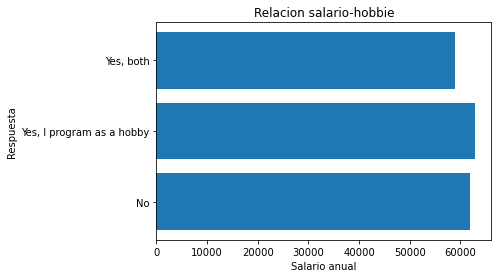

In [158]:
eje_x = ['No', 'Yes, I program as a hobby', 'Yes, both']
eje_y = df4['Earnings'].tolist()
plt.barh(eje_x, eje_y)
plt.ylabel('Respuesta')
plt.xlabel('Salario anual')
plt.title('Relacion salario-hobbie')
 
plt.show()

<h2 style='color: #000000'>Respuesta</h2>
<p>Los analistas que programan por hobbie ganan, en promedio, mas dinero anualmente. Pero son menos los analistas que programan por trabajo que los que lo hacen como hobby.</p>

<h2 style='color: #000000'>5. En promedio, cual es el nivel academico mas comun entre los analistas de datos?   </h2>

In [159]:
df

,Year,Hobbyist,Earnings,Country,EdLevel,Employment,JobSat,UndergradMajor,YearsCodePro,Data scientist or machine learning specialist,Database administrator
0,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,Computer science,2.0,1,1
1,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,Computer science,3.0,1,0
2,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,Computer science,4.0,1,0
3,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,Computer science,15.0,0,1
4,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,Computer science,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
33521,2020,"Yes, I program as a hobby",225000.00000,United States,Some college/university study without earning ...,Employed full-time,8.0,Mathematics or statistics,15.0,0,0
33522,2020,"Yes, I program as a hobby",369.00000,"Venezuela, Bolivarian Republic of...",Some college/university study without earning ...,Employed full-time,2.0,Computer science,27.0,0,1
33523,2020,No,38484.00000,Hungary,Master's degree,"Independent contractor, freelancer, or self-em...",8.0,Humanities,12.0,0,0
33524,2020,"Yes, I program as a hobby",140000.00000,United States,Doctoral degree,Employed full-time,8.0,Another engineering discipline,12.0,1,0


In [160]:
df.EdLevel.value_counts(normalize=True)

Bachelor's degree                                                    0.434797
Master's degree                                                      0.268329
Some college/university study without earning a bachelor's degree    0.132763
Doctoral degree                                                      0.055450
Secondary school                                                     0.053212
Associate degree                                                     0.030186
Professional degree                                                  0.014944
Primary/elementary school                                            0.005876
I never completed any formal education                               0.004146
I prefer not to answer                                               0.000298
Name: EdLevel, dtype: float64

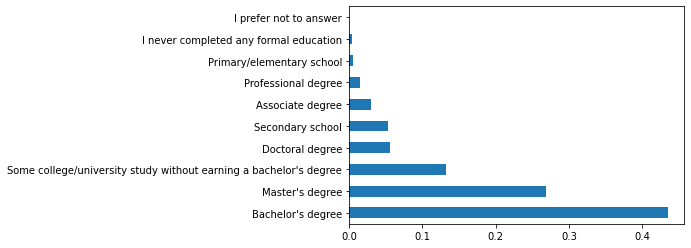

In [161]:
df.EdLevel.value_counts(normalize=True).plot.barh()
plt.show()

<h2 style='color: #000000'>Respuesta</h2>
<p>En promedio, el titulo de bachillerato entre los analistas de datos es el mas frecuente</p>